In [2]:
import pandas as pd
import numpy as np
import graphlab as gl
import time
from graphlab import SGraph, Vertex, Edge, SFrame, degree_counting, connected_components, shortest_path

<h2>Practice cells from GraphLab's Website</h2>

In [7]:
url = 'https://static.turi.com/datasets/millionsong/song_data.csv'
songs = gl.SFrame.read_csv(url)

Downloading https://static.turi.com/datasets/millionsong/song_data.csv to /var/tmp/graphlab-sanjayelangovan/14710/6c6197c3-dac3-41e8-b62a-fc187eff1de5.csv

Finished parsing file https://static.turi.com/datasets/millionsong/song_data.csv

Parsing completed. Parsed 100 lines in 1.21691 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 637410 lines. Lines per second: 350866

Finished parsing file https://static.turi.com/datasets/millionsong/song_data.csv

Parsing completed. Parsed 1000000 lines in 2.27714 secs.

In [8]:
songs.show()

Canvas is updated and available in a tab in the default browser.


In [9]:
songs['num_words'] = songs['title'].apply(lambda x: len(x.split(' ')))

In [10]:
songs.groupby('artist_name', {'total': graphlab.aggregate.COUNT})

artist_name,total
Gary Lewis & The Playboys,45
The Dells,54
DJ Konnat,1
VULTURE WHALE,11
Martha Argerich/KathiaBuniatishvili/Dora ...,1
S.S featuring Jp_ Mar DaCigar Splitter ...,1
Ian Astbury,11
Big L / Kool G Rap,1
Son House,106
Lil Wayne / BG,1


In [12]:
url = 'https://static.turi.com/datasets/regression/Housing.csv'
x = graphlab.SFrame.read_csv(url)
m = graphlab.linear_regression.create

Downloading https://static.turi.com/datasets/regression/Housing.csv to /var/tmp/graphlab-sanjayelangovan/3481/04d75596-449d-4a54-a710-8fb8f86ae0f1.csv

Finished parsing file https://static.turi.com/datasets/regression/Housing.csv

Parsing completed. Parsed 100 lines in 0.029802 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,int,str,str,str,str,str,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://static.turi.com/datasets/regression/Housing.csv

Parsing completed. Parsed 546 lines in 0.009363 secs.

In [11]:
g = gl.SGraph()
verts = [Vertex(0, attr={'breed': 'labrador'}),
         Vertex(1, attr={'breed': 'labrador'}),
         Vertex(2, attr={'breed': 'vizsla'})]
g = g.add_vertices(verts)
g = g.add_edges([Edge(0, 2), Edge(1, 2)])
g.show(highlight=[2, 3], vlabel='id', arrows=True)

Canvas is updated and available in a tab in the default browser.


<h2> Importing and Cleaning up Data </h2>

In [4]:
#Importing key dataframes
people = gl.SFrame.read_csv("files/csv/people.csv")
organizations = gl.SFrame.read_csv('files/csv/organizations.csv')
p1 = gl.SFrame.read_csv("files/p1.csv")

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1605669545.log


This non-commercial license of GraphLab Create for academic use is assigned to sanjay_elangovan@berkeley.edu and will expire on November 11, 2021.


Finished parsing file /Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning/files/csv/people.csv

Parsing completed. Parsed 100 lines in 1.35228 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,int,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 127826 lines. Lines per second: 84648.6

Unable to parse line "fa217ad8-7792-42fb-8fb5-48da408ea385,Ralf S.,person,ralf-s,https://www.crunchbase.com/person/ralf-s,521448,2018-02-24 11:14:29,2018-02-24 11:14:55,Ralf,S.,male,,,,,8cf14f21-8753-4605-b229-f422b805da7e,"Shift"

Unable to parse line "Shift",President & Lead Developer,,,,"https://crunchbase-production-res.cloudinary.com/image/upload/c_lpad,h_120,w_120,f_jpg/zvvh5zllrhg6dnu7itny""

Unable to parse line "63c7a4c7-21bd-4f7e-a018-8ceec5ee381c,Will L.,person,will-l-381c,https://www.crunchbase.com/person/will-l-381c,535452,2018-02-24 11:14:29,2018-09-08 02:47:44,Will,L.,male,,,,,8cf14f21-8753-4605-b229-f422b805da7e,"Shift"

Unable to parse line "Shift",Chief Marketing Officer,,,,"https://crunchbase-production-res.cloudinary.com/image/upload/c_lpad,h_120,w_120,f_jpg/bgwhklrdovap8yktskuo""

Unable to parse line "5983e47b-86be-495d-86dd-174e4eab046e,Raghav Sarin,person,raghav-sarin,https://www.crunchbase.com/person/raghav-sarin,177940,2018-03-28 13:47:46,2018-09-08 02:41:13,Raghav,Sarin,male,IND,,Delhi,Delhi,c99c083f-1a12-419b-8e66-b710c349743f,"Sapiens X"

Unable to parse line "Raghav Sarin",Head,,https://www.linkedin.com/in/raghav-sarin-7642386b/,,"https://crunchbase-production-res.cloudinary.com/image/upload/c_lpad,h_120,w_120,f_jpg/i4byjljpe98rapedqkgu""

Read 620236 lines. Lines per second: 88282

6 lines failed to parse correctly

Finished parsing file /Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning/files/csv/people.csv

Parsing completed. Parsed 1055810 lines in 12.0104 secs.

Unable to parse line "3d472a5c-bbb1-0685-4491-cf3e6b68fe14,GoingOn,organization,goingon,https://www.crunchbase.com/organization/goingon,46918,2007-07-20 11:55:26,2019-06-24 21:46:55,,company,goingon.com,http://www.goingon.com,USA,CA,California,San Francisco,450 Sansome Street 1..."

Unable to parse line "",https://www.facebook.com/GoingOn-Networks-154758847925524/,https://www.linkedin.com/company/goingon,,"https://crunchbase-production-res.cloudinary.com/image/upload/c_lpad,h_120,w_120,f_jpg/v1397180551/a4885c15eaca27242a9fbaa752f47e87.jpg",,,,company,"

Unable to parse line "0e1e9d57-5c31-23ed-1d3f-052276d7dea8,Nielsen,organization,nielsen,https://www.crunchbase.com/organization/nielsen,45493,2007-08-22 17:57:37,2019-07-12 18:48:01,,"investor,company",nielsen.com,http://www.nielsen.com/,USA,NY,New York,New York,,,ipo,Global ma..."

Unable to parse line "",https://www.facebook.com/Nielsen/,https://www.linkedin.com/company/nielsen/,https://twitter.com/nielsen,"https://crunchbase-production-res.cloudinary.com/image/upload/c_lpad,h_120,w_120,f_jpg/z6g6sgagu4izbwk6v4qx",Nielsen Holdings,The Nielsen Company,,co..."

Unable to parse line "0bc4e3cb-84b9-53a5-3403-7c13928f883b,Dubilier & Company,organization,dubilier-company,https://www.crunchbase.com/organization/dubilier-company,227415,2008-02-23 07:52:47,2019-06-24 21:38:47,,investor,dubilier.com,http://www.dubilier.com,USA,CT,Connecticut,..."

Unable to parse line "203-351-2890",,,,"https://crunchbase-production-res.cloudinary.com/image/upload/c_lpad,h_120,w_120,f_jpg/v1397179062/864289dadf4f6c16cdd62020cb7a52f3.jpg",,,,investor,1"

Unable to parse line "bad153db-3106-a419-e47a-55a67e584ade,Rothschild & Co.,organization,rothschild-gestion,https://www.crunchbase.com/organization/rothschild-gestion,83584,2008-03-07 07:30:14,2020-03-09 22:50:07,,"investor,company",rothschild.com,http://www.rothschild.com,FRA,..."

Unable to parse line "",https://www.facebook.com/rothschildandco/,https://www.linkedin.com/company/rothschildandco/,https://twitter.com/rothschildco,"https://crunchbase-production-res.cloudinary.com/image/upload/c_lpad,h_120,w_120,f_jpg/v1494475967/sauhc0atm1vejc5qscoo.png",,,,..."

VW5hYmxlIHRvIHBhcnNlIGxpbmUgImFiNjljM2UyLWNiNDEtZmExOS1lNTJlLTFhY2YyMDZkNjUzMCxIU0UyNCxvcmdhbml6YXRpb24saHNlMjQsaHR0cHM6Ly93d3cuY3J1bmNoYmFzZS5jb20vb3JnYW5pemF0aW9uL2hzZTI0LDEzMjc4OSwyMDA5LTEwLTIxIDAyOjA5OjExLDIwMTgtMDItMTIgMjM6NTk6NDEsLGNvbXBhbnksaHNlMjQuY29tLGh0dHA6Ly93d3cuaHNlMjQuY29tLyxERVUsLEJheWVybixJc21hbmluZyxNw7xuY2hlbmVyIFN0cmHDn2UgMTAxaCw4NTczNyxhY3F1aXJlZCwuLi4i

Unable to parse line "",https://www.facebook.com/hse24,,,"https://crunchbase-production-res.cloudinary.com/image/upload/c_lpad,h_120,w_120,f_jpg/fdufm1zdmtfycy21jwqt",Home Shopping Europe ,,,company,"

61 lines failed to parse correctly

Finished parsing file /Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning/files/csv/organizations.csv

Parsing completed. Parsed 100 lines in 1.2808 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,int,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,int,int,int,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unable to parse line "3d472a5c-bbb1-0685-4491-cf3e6b68fe14,GoingOn,organization,goingon,https://www.crunchbase.com/organization/goingon,46918,2007-07-20 11:55:26,2019-06-24 21:46:55,,company,goingon.com,http://www.goingon.com,USA,CA,California,San Francisco,450 Sansome Street 1..."

Unable to parse line "",https://www.facebook.com/GoingOn-Networks-154758847925524/,https://www.linkedin.com/company/goingon,,"https://crunchbase-production-res.cloudinary.com/image/upload/c_lpad,h_120,w_120,f_jpg/v1397180551/a4885c15eaca27242a9fbaa752f47e87.jpg",,,,company,"

Unable to parse line "0e1e9d57-5c31-23ed-1d3f-052276d7dea8,Nielsen,organization,nielsen,https://www.crunchbase.com/organization/nielsen,45493,2007-08-22 17:57:37,2019-07-12 18:48:01,,"investor,company",nielsen.com,http://www.nielsen.com/,USA,NY,New York,New York,,,ipo,Global ma..."

Unable to parse line "",https://www.facebook.com/Nielsen/,https://www.linkedin.com/company/nielsen/,https://twitter.com/nielsen,"https://crunchbase-production-res.cloudinary.com/image/upload/c_lpad,h_120,w_120,f_jpg/z6g6sgagu4izbwk6v4qx",Nielsen Holdings,The Nielsen Company,,co..."

Unable to parse line "0bc4e3cb-84b9-53a5-3403-7c13928f883b,Dubilier & Company,organization,dubilier-company,https://www.crunchbase.com/organization/dubilier-company,227415,2008-02-23 07:52:47,2019-06-24 21:38:47,,investor,dubilier.com,http://www.dubilier.com,USA,CT,Connecticut,..."

Unable to parse line "203-351-2890",,,,"https://crunchbase-production-res.cloudinary.com/image/upload/c_lpad,h_120,w_120,f_jpg/v1397179062/864289dadf4f6c16cdd62020cb7a52f3.jpg",,,,investor,1"

Unable to parse line "bad153db-3106-a419-e47a-55a67e584ade,Rothschild & Co.,organization,rothschild-gestion,https://www.crunchbase.com/organization/rothschild-gestion,83584,2008-03-07 07:30:14,2020-03-09 22:50:07,,"investor,company",rothschild.com,http://www.rothschild.com,FRA,..."

Unable to parse line "",https://www.facebook.com/rothschildandco/,https://www.linkedin.com/company/rothschildandco/,https://twitter.com/rothschildco,"https://crunchbase-production-res.cloudinary.com/image/upload/c_lpad,h_120,w_120,f_jpg/v1494475967/sauhc0atm1vejc5qscoo.png",,,,..."

Unable to parse line "0a0fb46f-4d3e-78a6-180c-feb0c4afee68,Illinois Ventures,organization,illinois-ventures,https://www.crunchbase.com/organization/illinois-ventures,110476,2008-03-14 00:17:29,2020-03-25 17:05:12,,investor,illinoisventures.com,http://www.illinoisventures.com,US..."

Unable to parse line "(312) 996-9853"

Read 71997 lines. Lines per second: 43166.9

Read 366317 lines. Lines per second: 48932.7

Read 665070 lines. Lines per second: 49972.5

Read 974618 lines. Lines per second: 49547.6

8126 lines failed to parse correctly

Finished parsing file /Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning/files/csv/organizations.csv

Parsing completed. Parsed 1127388 lines in 22.5882 secs.

Finished parsing file /Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning/files/p1.csv

Parsing completed. Parsed 100 lines in 0.020398 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning/files/p1.csv

Parsing completed. Parsed 7822 lines in 0.018958 secs.

In [167]:
#Joining people and organizations
join1 = people.join(organizations, on={'featured_job_organization_uuid':'uuid'}, how='inner')

In [169]:
#Joining P1 dataset (and removing companies that do not have P1 groups in the process)
join2 = join1.join(p1, on={'featured_job_organization_uuid':'uuid'}, how='inner')

In [22]:
#Display the table as an SFrame
join2.show()
len(join2)

Canvas is accessible via web browser at the URL: http://localhost:53000/index.html
Opening Canvas in default web browser.


17012

In [170]:
#Collect edges
edges = []
start_time = time.time()
for i in range (55):
    for j in range (i+1,55):
        if join2[i].get('featured_job_organization_uuid') == join2[j].get('featured_job_organization_uuid'):
            edges.append(Edge(i,j))
    if i%5 == 0:
        print("{} vertices have been checked.".format(i))
print("--- %s seconds ---" % (time.time() - start_time))

0 vertices have been checked.
5 vertices have been checked.
10 vertices have been checked.
15 vertices have been checked.
20 vertices have been checked.
25 vertices have been checked.
30 vertices have been checked.
35 vertices have been checked.
40 vertices have been checked.
45 vertices have been checked.
50 vertices have been checked.
--- 125.203579903 seconds ---


In [78]:
#Collect vertices
verts = []
for i in range (60):
    verts.append(Vertex(i, attr={'name': join2[i].get('name')}))

In [79]:
g = SGraph()
g = g.add_vertices(verts)
g = g.add_edges(edges)

In [80]:
g.show()

Canvas is updated and available in a tab in the default browser.


In [87]:
deg = degree_counting.create(g)
deg_graph = deg['graph'] # a new SGraph with degree data attached to each vertex
in_degree = deg_graph.vertices[['__id', 'in_degree']]
out_degree = deg_graph.vertices[['__id', 'out_degree']]

print(in_degree)
print(out_degree)

+------+-----------+
| __id | in_degree |
+------+-----------+
|  27  |     15    |
|  29  |     17    |
|  33  |     21    |
|  52  |     40    |
|  50  |     38    |
|  47  |     35    |
|  7   |     7     |
|  10  |     10    |
|  8   |     8     |
|  5   |     5     |
+------+-----------+
[60 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
+------+------------+
| __id | out_degree |
+------+------------+
|  27  |     27     |
|  29  |     25     |
|  33  |     21     |
|  52  |     2      |
|  50  |     4      |
|  47  |     7      |
|  7   |     4      |
|  10  |     1      |
|  8   |     3      |
|  5   |     6      |
+------+------------+
[60 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [85]:
deg.show()

Canvas is updated and available in a tab in the default browser.


In [88]:
cc = connected_components.create(g)
print cc.summary()
print cc.list_fields()

cc_ids = cc.get('component_id')  # an SFrame
cc_graph = cc['graph']

+-----------------------------+

| Number of components merged |

+-----------------------------+

| 177                         |

| 0                           |

+-----------------------------+

Class                                    : ConnectedComponentsModel

Graph
-----
num_edges                                : 969
num_vertices                             : 60

Results
-------
graph                                    : SGraph. See m['graph']
component size                           : SFrame. See m['component_size']
number of connected components           : 7
vertex component id                      : SFrame. See m['component_id']

Metrics
-------
training time (secs)                     : 1.1429

Queryable Fields
----------------
graph                                    : A new SGraph with the color id as a vertex property
component_id                             : An SFrame with each vertex's component id
component_size                           : An SFrame with the size of each component
training_time                            : Total training time of the model

None
['component_id', 'component_size', 'graph', 'training_time']


In [91]:
cc.graph.show()
cc['component_size']

Canvas is updated and available in a tab in the default browser.


component_id,Count
5,43
6,12
13,1
17,1
31,1
55,1
56,1


## Other Data Sources

In [7]:
jobs = gl.SFrame.read_csv('files/csv/jobs.csv')
investments = gl.SFrame.read_csv('files/csv/investments.csv')
investment_partners = gl.SFrame.read_csv('files/csv/investment_partners.csv')

Finished parsing file /Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning/files/csv/jobs.csv

Parsing completed. Parsed 100 lines in 1.18185 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 132419 lines. Lines per second: 100377

Read 768424 lines. Lines per second: 120799

Unable to parse line "84ade403-9b33-4b18-b594-7c4bcff80caa,"Will L. Chief Marketing Officer @ Shift"

Unable to parse line "Shift",job,will-l-381c-executive-shift-da7e--84ade403,https://www.crunchbase.com/job/will-l-381c-executive-shift-da7e--84ade403,,2018-02-24 11:14:29,2018-02-24 11:14:29,63c7a4c7-21bd-4f7e-a018-8ceec5ee381c,Will L.,8cf14f21-8753-4605-b229-f422b805da7e,"Shif..."

Unable to parse line "Shift",,,True,Chief Marketing Officer,executive"

Unable to parse line "4ec2f7ce-73fd-4f42-9a96-0cf968ae21f3,"Ralf S. President & Lead Developer @ Shift"

Unable to parse line "Shift",job,ralf-s-executive-shift-da7e--4ec2f7ce,https://www.crunchbase.com/job/ralf-s-executive-shift-da7e--4ec2f7ce,,2018-02-24 11:14:29,2018-02-24 11:14:29,fa217ad8-7792-42fb-8fb5-48da408ea385,Ralf S.,8cf14f21-8753-4605-b229-f422b805da7e,"Shift"

Unable to parse line "Shift",,,True,President & Lead Developer,executive"

Unable to parse line "39d5d66f-018c-4439-ba02-a75bd1419416,"Raghav Sarin Head @ Sapiens X"

Unable to parse line "Raghav Sarin",job,raghav-sarin-executive-sapiens-x-raghav-sarin--39d5d66f,https://www.crunchbase.com/job/raghav-sarin-executive-sapiens-x-raghav-sarin--39d5d66f,,2018-03-28 13:47:46,2018-03-28 13:47:46,5983e47b-86be-495d-86dd-174e4eab046e,Raghav Sarin,c99c..."

Unable to parse line "Raghav Sarin",,,True,Head,executive"

Unable to parse line "d7751d88-78fd-44f9-bba9-8203ee4fd9bb,"Paul Cahierre President @ President"

Read 1274995 lines. Lines per second: 110042

12 lines failed to parse correctly

Finished parsing file /Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning/files/csv/jobs.csv

Parsing completed. Parsed 1536363 lines in 13.7328 secs.

Finished parsing file /Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning/files/csv/investments.csv

Parsing completed. Parsed 100 lines in 1.02394 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 115612 lines. Lines per second: 102174

Finished parsing file /Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning/files/csv/investments.csv

Parsing completed. Parsed 517635 lines in 3.97426 secs.

Finished parsing file /Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning/files/csv/investment_partners.csv

Parsing completed. Parsed 100 lines in 0.836781 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/sanjayelangovan/Desktop/School/Grad School/Term 3/coursework/Projects/final_project/crunchbase-p1-machine-learning/files/csv/investment_partners.csv

Parsing completed. Parsed 89924 lines in 0.843804 secs.

In [116]:
join3 = p1.join(jobs, on={'uuid':'org_uuid'}, how='inner')

<h2>Looking at Organizations and Investments</h2>

In [8]:
orgs_and_investments = investments.join(organizations, on={'investor_uuid':'uuid'},how='inner')

In [20]:
invest = pd.read_csv('files/csv/investments.csv')
print('INVESTMENTS cols: {}\nSHAPE: {}\n'.format(invest.columns.to_list(), invest.shape))

INVESTMENTS cols: ['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at', 'updated_at', 'funding_round_uuid', 'funding_round_name', 'investor_uuid', 'investor_name', 'investor_type', 'is_lead_investor']
SHAPE: (517635, 14)



In [98]:
names = invest['funding_round_name'].str.split("- ")

names2 = []
for i in range (len(names)):
    if i not in [418262, 488416]: #Handling NaN values by just entering 'NA'
        names2.append(names[i][1])
    else:
        names2.append('NA')

In [100]:
investments['investees'] = names2

In [166]:
#Add Nodes
verts1 = []
unique_investors = list(invest['investor_name'].drop_duplicates())
unique_investees = list(pd.Series(names2).drop_duplicates())

all_orgs=[]
all_orgs = unique_investors + unique_investees

for i in range(len(total_list)):
    verts1.append(Vertex(i, attr={'name': total_list[i]}))

In [161]:
#Collect edges
edges = []
start_time = time.time()

for i in range (len(investments['investees'])):
    edges.append(Edge(all_orgs.index(investments['investees'][i]),all_orgs.index(investments['investor_name'][i])))
    if i % 100000 == 0:
        print("{} vertices have been checked.".format(i))
        print("%s seconds have elapsed \n" % (time.time() - start_time))

0 vertices have been checked.
0.0385160446167 seconds have elapsed 

100000 vertices have been checked.
2105.47337818 seconds have elapsed 

200000 vertices have been checked.
4310.78309703 seconds have elapsed 



ValueError: 'nan' is not in list

In [162]:
len(edges)

272777

# Creating a small CB database and plotting it

In [1]:
from graphlab import load_sgraph 

In [3]:
cb = load_sgraph('files/CrunchbaseGraphs/Crunchbase_2Ways_MultiEdge')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1607524497.log


This non-commercial license of GraphLab Create for academic use is assigned to sanjay_elangovan@berkeley.edu and will expire on November 11, 2021.


In [4]:
#The ID is for Google, and is looking at companies 1 away
subgraph2 = cb.get_neighborhood(ids=['6acfa7da-1dbd-936e-d985-cf07a1b27711'], radius=1, full_subgraph=True)

In [9]:
subgraph2.show()

Canvas is accessible via web browser at the URL: http://localhost:57316/index.html
Opening Canvas in default web browser.


In [203]:
subgraph2

SGraph({'num_edges': 3387, 'num_vertices': 1098})
Vertex Fields:['__id', 'name', '__node_type', 'p1_tag']
Edge Fields:['__src_id', '__dst_id', '__edge_type', '__id', 'investment_type', 'investor_count', 'is_lead_investor', 'job_type', 'lead_investor_count', 'raised_amount_usd', 'status', 'title']

In [41]:
subgraph2a = cb.get_neighborhood(ids=['6acfa7da-1dbd-936e-d985-cf07a1b27711'], radius=1, full_subgraph=False)

In [42]:
subgraph2a

SGraph({'num_edges': 2922, 'num_vertices': 1098})
Vertex Fields:['__id', 'name', '__node_type', 'p1_tag']
Edge Fields:['__src_id', '__dst_id', '__edge_type', '__id', 'investment_type', 'investor_count', 'is_lead_investor', 'job_type', 'lead_investor_count', 'raised_amount_usd', 'status', 'title']

Google was a bit too large - Let's try another.

In [23]:
a = cb.get_vertices(fields={'name': 'Samsung Electronics'})
a['__id']

dtype: str
Rows: 1
['df14597c-3e51-8d58-9c15-fb3de3a34a54']

In [32]:
subgraph3 = cb.get_neighborhood(ids=['df14597c-3e51-8d58-9c15-fb3de3a34a54'], radius=1, full_subgraph=True)

In [33]:
subgraph3

SGraph({'num_edges': 424, 'num_vertices': 152})
Vertex Fields:['__id', 'name', '__node_type', 'p1_tag']
Edge Fields:['__src_id', '__dst_id', '__edge_type', '__id', 'investment_type', 'investor_count', 'is_lead_investor', 'job_type', 'lead_investor_count', 'raised_amount_usd', 'status', 'title']

In [34]:
subgraph3.show(vlabel='id', arrows=True)

Canvas is updated and available in a tab in the default browser.


Samsung fits, but actually contains too much info. Better to create a smaller graph

# Creating a small subgraph manually

In [200]:
verts =[Vertex('Google'),
        Vertex('23andMe'),
        Vertex('Bradley Horowitz'),
        Vertex('Virage'),
        Vertex('Yahoo'),
        Vertex('Tesla'),
        Vertex('Fon'),
        Vertex('Baidu'),
        Vertex('SolarCity'),
        Vertex('Alejandro Guzmán'),
        Vertex('Alan Masarek'),
        Vertex('Vonage'),
        Vertex('Kemas Antonius'),
        Vertex('Shipper'),
        Vertex('TokoTalk'),
        Vertex('Tonara'),
        Vertex('Brad Buss'),
        Vertex('Cypress Semiconductor'),
        Vertex('DBL Partners'),
        Vertex('eMeter'),
        Vertex('Ren Ren TV'),
        Vertex('InCapital'),
        Vertex('Maxim Sirenko'),
        Vertex('DFJ Growth'),
        Vertex('Silver Spring Networks'),
        Vertex('Panasonic'),
        Vertex('Andres Fajardo'),
        Vertex('Wysh'),
        Vertex('Qualcomm Ventures'),
        Vertex('Matterport')]

edges = [Edge('Google','23andMe'), 
         Edge('Google','23andMe'), 
         Edge('Google','Bradley Horowitz'), 
         Edge('Bradley Horowitz', 'Virage'), 
         Edge('Bradley Horowitz','Yahoo'), 
         Edge('Google','Tesla'), 
         Edge('Google','Fon'),
         Edge('Google','Baidu'),
         Edge('Google','SolarCity'), 
         Edge('Google','Alejandro Guzmán'),
         Edge('Google','Alan Masarek'),
         Edge('Alan Masarek','Vonage'),
         Edge('Baidu', 'Kemas Antonius'),
         Edge('Kemas Antonius','Shipper'),
         Edge('Kemas Antonius','TokoTalk'),
         Edge('Baidu','Tonara'),
         Edge('Brad Buss', 'Cypress Semiconductor'),
         Edge('SolarCity','Brad Buss'),
         Edge('SolarCity','DBL Partners'),
         Edge('DBL Partners','eMeter'),
         Edge('Baidu','Ren Ren TV'),
         Edge('Ren Ren TV','InCapital'),
         Edge('Tesla','DFJ Growth'),
         Edge('Maxim Sirenko','DFJ Growth'),
         Edge('DFJ Growth','Silver Spring Networks'),
         Edge('Panasonic','Tesla'),
         Edge('Fon','Andres Fajardo'),
         Edge('Andres Fajardo','Wysh'),
         Edge('Fon','Qualcomm Ventures'),
         Edge('Fon','Matterport')]

In [201]:
g2 = gl.SGraph()
g2 = g2.add_vertices(verts)
g2 = g2.add_edges(edges)
g2.show(vlabel='id', arrows=False)

Canvas is updated and available in a tab in the default browser.


In [193]:
print(cb.get_vertices(fields={'name': 'Fon'})['__id'])

['e241ca1d-e66c-aab4-8160-ea19c4b292e1']


In [194]:
fon_sframe_srcs = cb.get_edges(src_ids='e241ca1d-e66c-aab4-8160-ea19c4b292e1') 

In [195]:
print(fon_sframe_srcs[(fon_sframe_srcs['__edge_type']=='job')&(fon_sframe_srcs['job_type']=='executive')]['__dst_id'].unique())

['fefa91fd-ff40-4251-c950-6fdfd67ce020', 'd2b3f088-8b32-48cc-dcb5-a7577bd7250e', 'c1bd4d30-8e5c-8c2e-1cf7-54cee678ba30', '1842f08b-4c4b-03da-4b6b-45d1c168be16', 'd01ca986-36c0-6304-ba85-6542c4417005', '1a6a0d92-1af5-a61e-2b4e-7541fd839423', '4db74ac8-8dfc-f998-8b9a-3bc1788080b2', '4dd9ffa2-184f-a730-6933-c4cb85b89e94', 'c3bf706e-5441-656c-a0dc-f76aa73febab', '32c8a330-b595-a009-25ce-2113c315a541', '363ce0c0-0c5e-635d-724b-079c54bb871d']


In [198]:
print(fon_sframe_srcs[(fon_sframe_srcs['__edge_type']=='investment')]['__dst_id'].unique())

['04850d4f-10e8-1f2f-e54a-2b9ceae952d5', '60b5dade-24ed-84b0-99e2-1ecda554a1ab', '5f179d40-9f32-672f-ef1e-aade22c090b4', '9a0e860a-7743-28e2-05c0-2b08646d0fe1', 'b0e48dc7-b315-4f67-94cf-2abd2cba572e', '0c867fde-2b9a-df10-fdb9-66b74f355f91', 'c8886ad6-0c43-9d0e-21c4-e2b3027ae85a', '1136a450-8a97-40f4-d9c8-e8ffeb529de3', '8dc173c7-2c08-250d-9b34-e6a0db4419da', '6acfa7da-1dbd-936e-d985-cf07a1b27711', '826a923c-a90c-b01d-144d-140a976e7657', '100650cd-9a76-7ad8-209d-56da3c4bc540', 'cc0cbf26-83e5-d977-02fa-f2b2f9f32a73', 'f5723c07-4fc7-416f-9c2b-59c964a90d8f', '729c8617-9a63-93dd-aa23-ff6f3bb63de2', '2a6aa03d-bc57-500e-2e97-6a1ff1cc0745', '3b476c5e-6190-fa89-537d-51f8f1ad8ef6', 'c683360d-9535-9172-583f-8023d7ff9ab9']


In [199]:
entry = '04850d4f-10e8-1f2f-e54a-2b9ceae952d5'

a = cb.get_edges(src_ids=entry)
b = a['__dst_id'].unique()
print(len(b))
print(cb.get_vertices(fields={'__id': b[0]}))
print(cb.get_vertices(fields={'__id': entry}))

266
+-------------------------------+------------+-------------+--------+
|              __id             |    name    | __node_type | p1_tag |
+-------------------------------+------------+-------------+--------+
| aa3dcd48-4a3a-8654-4098-6a... | Matterport |   company   |   0    |
+-------------------------------+------------+-------------+--------+
[1 rows x 4 columns]

+-------------------------------+-------------------+-------------+--------+
|              __id             |        name       | __node_type | p1_tag |
+-------------------------------+-------------------+-------------+--------+
| 04850d4f-10e8-1f2f-e54a-2b... | Qualcomm Ventures |   investor  |   0    |
+-------------------------------+-------------------+-------------+--------+
[1 rows x 4 columns]



# Counting Degrees

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [6]:
edge_fields_list = subgraph2.get_edge_fields()
edges = [(row['__src_id'], row['__dst_id'], dict(list(row.items())[2:])) for row in subgraph2.edges[edge_fields_list]]
vertices_fields_list = subgraph2.get_vertex_fields()
nodes = [(row['__id'], dict(list(row.items())[1:])) for row in subgraph2.vertices[vertices_fields_list]]
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

In [23]:
edge_fields_list = cb.get_edge_fields()
edges = [(row['__src_id'], row['__dst_id'], dict(list(row.items())[2:])) for row in cb.edges[edge_fields_list]]
vertices_fields_list = cb.get_vertex_fields()
nodes = [(row['__id'], dict(list(row.items())[1:])) for row in cb.vertices[vertices_fields_list]]
g2 = nx.Graph()
g2.add_nodes_from(nodes)
g2.add_edges_from(edges)

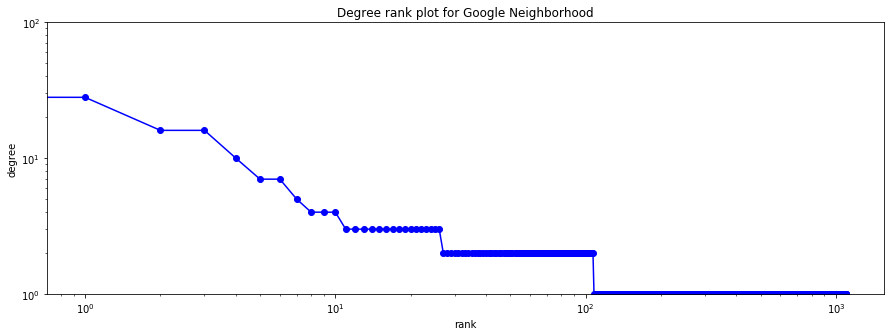

In [9]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
dmax = max(degree_sequence)

fig, ax = plt.subplots(figsize=(15,5))
plt.loglog(degree_sequence, "b-", marker="o")
ax.set_ylim([0, 100])
plt.title("Degree rank plot for Google Neighborhood")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

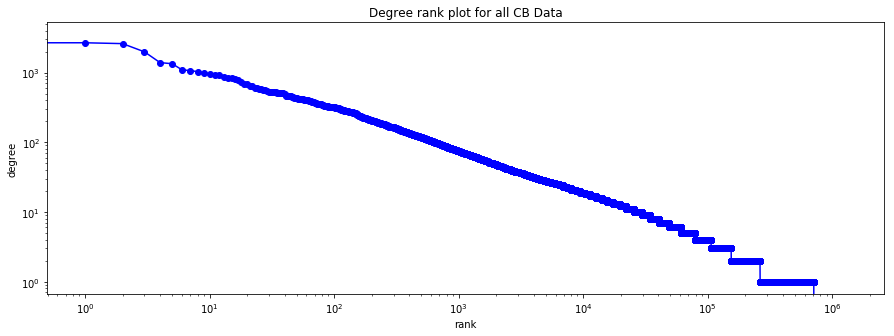

In [24]:
degree_sequence = sorted([d for n, d in g2.degree()], reverse=True)
dmax = max(degree_sequence)

fig, ax = plt.subplots(figsize=(15,5))
plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot for all CB Data")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()

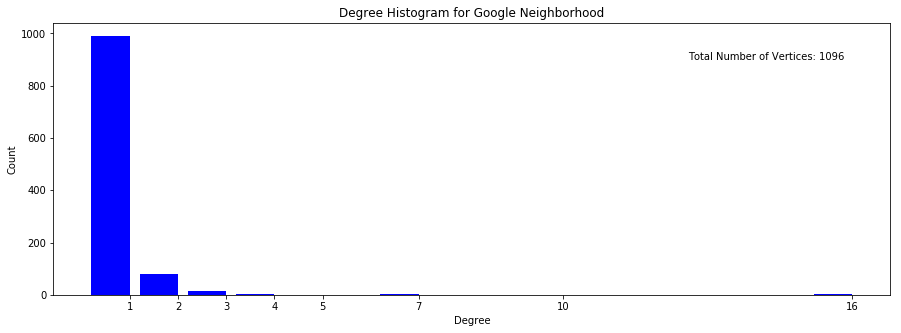

In [22]:
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize = (15,5))
deg = (1, 2, 3, 4, 5, 7, 10, 16)
cnt = (990, 81, 16, 3, 1, 2, 1, 2)
plt.bar(deg, cnt, width=0.80, color="b")


plt.title("Degree Histogram for Google Neighborhood")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.text(13, 900, 'Total Number of Vertices: 1096')
ax.set_xticklabels(deg)
plt.show()

In [25]:
degree_sequence = sorted([d for n, d in g2.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

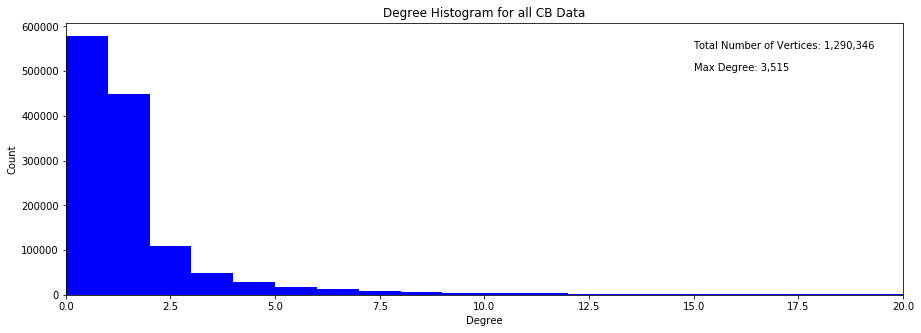

In [28]:
fig, ax = plt.subplots(figsize = (15,5))
plt.bar(list(deg), list(cnt), width=2, color="b")

plt.title("Degree Histogram for all CB Data")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xlim([0, 20])
ax.text(15, 550000, 'Total Number of Vertices: 1,290,346')
ax.text(15,500000, 'Max Degree: 3,515')
plt.show()

In [26]:
max(deg)

3515